In [1]:
import pickle
from pathlib import Path

import numpy as np
import pandas as pd
import nilearn.image as nii
from nilearn.image import resample_img
from nilearn.datasets import load_mni152_template, fetch_atlas_destrieux_2009
import nilearn.plotting as nilp
import nibabel

from sage.xai.utils import _mni, _nifti
import sage.xai.nilearn_plots as nilp_
from sage.utils.registration import register_bb2mni, register
from sage.data.dataloader import open_h5, open_h5_nifti
from sage.xai.atlas import get_atlas

mni = load_mni152_template()

/Users/daehyuncho/anaconda3/envs/brain/lib/python3.10/site-packages/dipy/viz/__init__.py:20: UserWarning: You do not have FURY installed. Therefore, 3D visualization functions will not work for you. Please install or upgrade FURY using pip install -U furyFor detailed installation instructions visit: https://fury.gl/
  warnings.warn(


## CerebrA Template

In [2]:
cerebra = get_atlas(atlas_name="cerebra", return_mni=False)

/Users/daehyuncho/codespace/brain-age-prediction/sage/xai/atlas.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhl[LABEL_COL] = rhl["Label Name"].apply(lambda s: f"{s}_R")
/Users/daehyuncho/codespace/brain-age-prediction/sage/xai/atlas.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lhl[LABEL_COL] = lhl["Label Name"].apply(lambda s: f"{s}_L")


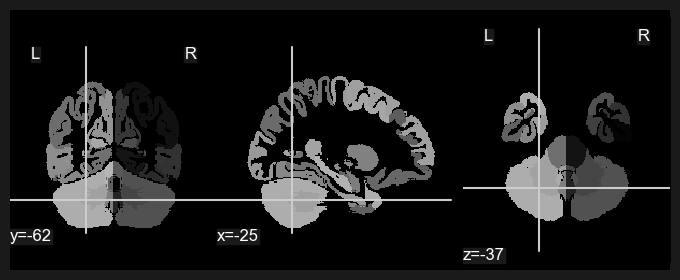

In [3]:
nilp.plot_anat(cerebra.nii)

In [4]:
cerebra.nii.affine, load_mni152_template().affine

(array([[   1.,    0.,    0.,  -96.],
        [   0.,    1.,    0., -132.],
        [   0.,    0.,    1.,  -78.],
        [   0.,    0.,    0.,    1.]]),
 array([[   1.,    0.,    0.,  -98.],
        [   0.,    1.,    0., -134.],
        [   0.,    0.,    1.,  -72.],
        [   0.,    0.,    0.,    1.]]))

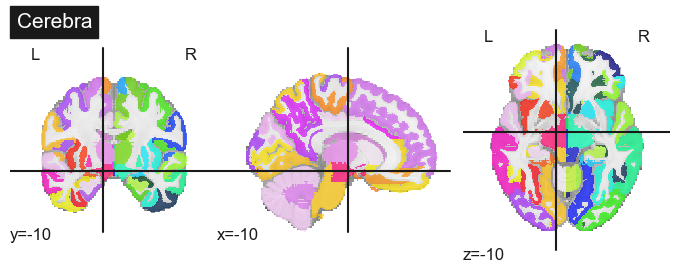

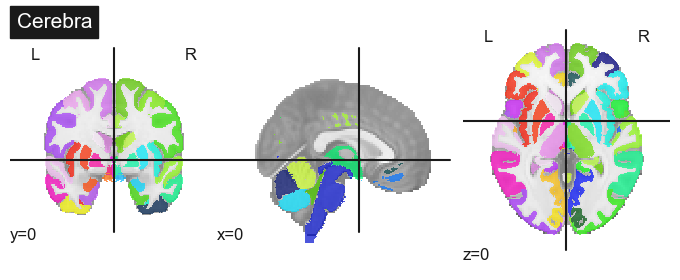

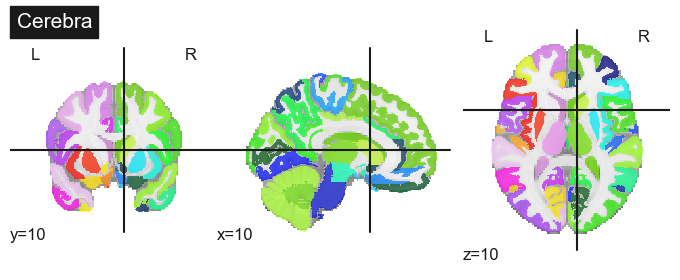

In [5]:
for cut_coord in [(-10, -10, -10), (0, 0, 0), (10, 10, 10)]:
    nilp.plot_roi(cerebra.nii, title="Cerebra", cut_coords=cut_coord)

(<nilearn.plotting.displays._slicers.OrthoSlicer at 0x2c1f99780>, None)

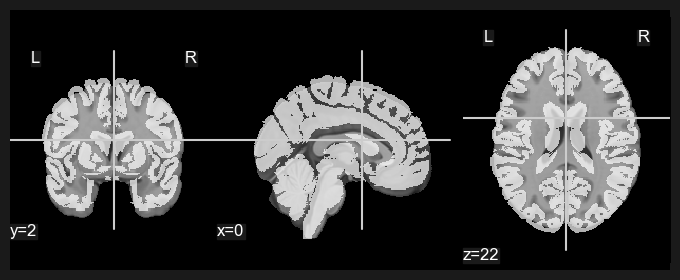

In [6]:
nilp_.plot_overlay(arr=(cerebra.array > 0).astype(np.int32), cmap=nilp.cm.black_blue_r)

(<nilearn.plotting.displays._slicers.OrthoSlicer at 0x2c2005c00>, None)

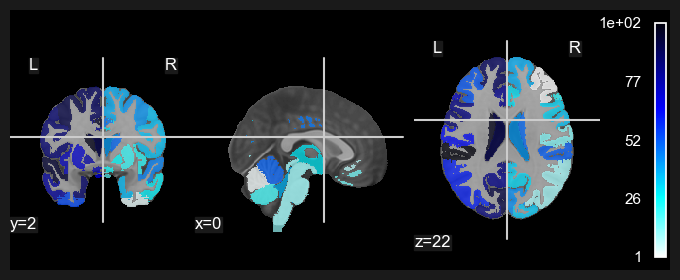

In [7]:
nilp_.plot_overlay(arr=cerebra.nii, cmap=nilp.cm.black_blue_r, colorbar=True)

In [11]:
import sage.xai.atlas_overlap as ao
import numpy as np
from sage.xai.atlas import get_atlas

In [10]:
cerebra = get_atlas(atlas_name="cerebra", return_mni=False)

# sal = np.load("assets/weights/resnet10t-aug/no-mask/ig-total/attrs.npy")
sal = ao.load_sal(path="resnet10t-aug",
                  mask="sigma=1.0",
                  xai="ig",
                  top_k=0.95,
                  load_top=True)
sal = ao.resample_sal(arr=sal, atlas=cerebra.nii)

xai_dict_abs, agg_sal_abs = ao.calculate_overlaps(arr=sal, atlas=cerebra);
xai_dict, agg_sal = ao.calculate_overlaps(arr=sal, atlas=cerebra, use_abs=False);

/Users/daehyuncho/codespace/brain-age-prediction/sage/xai/atlas.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rhl[LABEL_COL] = rhl["Label Name"].apply(lambda s: f"{s}_R")
/Users/daehyuncho/codespace/brain-age-prediction/sage/xai/atlas.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lhl[LABEL_COL] = lhl["Label Name"].apply(lambda s: f"{s}_L")


FileNotFoundError: [Errno 2] No such file or directory: 'assets/weights/weights/resnet10t-aug/sigma=1.0/igk0.95/top_attr.npy'